This dataset from [UCI](https://archive.ics.uci.edu/dataset/352/online+retail) has all the transactions of an online retailer in the UK during a 20 month time period. The goal is to group together customers of this retailer with similar purchasing behaviors.

# Cleaning the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('retail.csv')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# checking for missing data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There's no feasible way to fill in the customer IDs and determine whether these customers are repeat customers or not, so I'll drop these transactions.

In [5]:
# dropping rows with no customer ID
df = df.dropna(subset=['CustomerID'])

I'll check if there are any duplicate transactions.

In [6]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [7]:
# dropping duplicate transactions
df = df.drop_duplicates()

Now I want to check the canceled transactions. An invoice number starting with C means a canceled order. 

In [8]:
df[df['InvoiceNo'].str[0] == 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Seeing that the canceled orders have negative quantities, I want to check if any orders that are not canceled have negative quantities.

In [9]:
df[(df['InvoiceNo'].str[0] != 'C') & (df['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


I want to also get rid of canceled orders that don't correspond to a return.

In [10]:
# keep noncanceled orders and canceled orders that correspond to a return
rep_ords = df.duplicated(subset=['StockCode', 'Description', 'UnitPrice', 'CustomerID', 'Country'], keep=False)
df = df[rep_ords | (df['InvoiceNo'].str[0] != 'C')]

In [11]:
# set CustomerID's datatype as integer
df['CustomerID'] = df['CustomerID'].astype('int')

In [12]:
# put the invoice dates into a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Lastly, I want to check that each of the invoice numbers corresponds to the same invoice date and the same customer ID. Plus, each customer ID should correspond to the same country. 

In [13]:
inv_nos = df['InvoiceNo'].unique()
cust_ids = df['CustomerID'].unique()

inv_w_mult_dates = []
inv_w_mult_customers = []
customers_w_mult_countries = []

df_by_invoice_no = df.groupby('InvoiceNo')
for val in inv_nos:
    group = df_by_invoice_no.get_group(val)
    if group['InvoiceDate'].nunique() != 1:
        inv_w_mult_dates.append(val)
    if group['CustomerID'].nunique() != 1:
        inv_w_mult_customers.append(val)
    
df_by_customer_id = df.groupby('CustomerID')
for val in cust_ids:
    group = df_by_customer_id.get_group(val)
    if group['Country'].nunique() != 1:
        customers_w_mult_countries.append(val)

In [14]:
# get number of groups we need to look at
print(len(inv_w_mult_dates), len(inv_w_mult_customers), len(customers_w_mult_countries))

31 0 8


In [15]:
# see how much times for the invoices with multiple times can differ
for val in inv_w_mult_dates:
    group = df_by_invoice_no.get_group(val)
    group_dates = group['InvoiceDate']
    print(group_dates.max() - group_dates.min())

0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00
0 days 00:01:00


The invoices with multiple times only have the multiple times differ by a minute. This is not a problem.

In [16]:
# see how many countries each customer can represent
for val in customers_w_mult_countries:
    group = df_by_customer_id.get_group(val)
    print(f'Customer ID {val} corresponds to {group["Country"].nunique()} countries.')

Customer ID 12431 corresponds to 2 countries.
Customer ID 12429 corresponds to 2 countries.
Customer ID 12370 corresponds to 2 countries.
Customer ID 12417 corresponds to 2 countries.
Customer ID 12422 corresponds to 2 countries.
Customer ID 12455 corresponds to 2 countries.
Customer ID 12457 corresponds to 2 countries.
Customer ID 12394 corresponds to 2 countries.


In [17]:
# see the distribution of countries for customers of multiple countries
for val in customers_w_mult_countries:
    group = df_by_customer_id.get_group(val)
    country_counts = group['Country'].value_counts()
    print(f'''Customer ID {val} has {country_counts[0]} transactions for {country_counts.index[0]} and {country_counts[1]} transactions for {country_counts.index[1]}.''')

Customer ID 12431 has 185 transactions for Australia and 54 transactions for Belgium.
Customer ID 12429 has 76 transactions for Denmark and 21 transactions for Austria.
Customer ID 12370 has 158 transactions for Cyprus and 8 transactions for Austria.
Customer ID 12417 has 175 transactions for Belgium and 23 transactions for Spain.
Customer ID 12422 has 21 transactions for Australia and 18 transactions for Switzerland.
Customer ID 12455 has 48 transactions for Spain and 42 transactions for Cyprus.
Customer ID 12457 has 65 transactions for Switzerland and 3 transactions for Cyprus.
Customer ID 12394 has 21 transactions for Belgium and 6 transactions for Denmark.


It looks like for most cases, there's a country that most of the transactions come from.

# Consolidating data for each customer

In this part, I want to create a dataframe that contains relevant information for each customer, such as the time since the last purchase (from the latest purchase we have available), the number of orders they placed, the total amount spent in the time period we have data available, and the country of the customer.

In [18]:
cust_df = pd.DataFrame()
latest_time = df['InvoiceDate'].max()

In [19]:
last_purchase_time = group['InvoiceDate'].max()
cust_df['TimeSinceLastPurchase'] = df_by_customer_id.apply(lambda x :latest_time - x['InvoiceDate'].max())

cust_df['NumInvoices'] = df_by_customer_id.apply(lambda x : x['InvoiceNo'].nunique())

cust_df['TotalSpent'] = df_by_customer_id.apply(lambda x : x['Quantity'].dot(x['UnitPrice']))

cust_df['Country'] = df_by_customer_id.apply(lambda x : x['Country'].value_counts().idxmax())

In [20]:
cust_df

,TimeSinceLastPurchase,NumInvoices,TotalSpent,Country
CustomerID,,,,
12346,325 days 02:33:00,2,3.184120e-12,United Kingdom
12347,1 days 20:58:00,7,4.310000e+03,Iceland
12348,74 days 23:37:00,4,1.797240e+03,Finland
12349,18 days 02:59:00,1,1.757550e+03,Italy
12350,309 days 20:49:00,1,3.344000e+02,Norway
...,...,...,...,...
18280,277 days 02:58:00,1,1.806000e+02,United Kingdom
18281,180 days 01:57:00,1,8.082000e+01,United Kingdom
18282,7 days 01:07:00,3,1.766000e+02,United Kingdom


In [21]:
# convert time into minutes
cust_df['TimeSinceLastPurchase'] = cust_df['TimeSinceLastPurchase'].dt.total_seconds() / 60

# Preparing customer data for k-prototypes

Now I want to clean up the dataframe for the customers in preparation for performing the k-prototypes algorithm.

In [22]:
# see if there are customers who have spent negative money or no money in the time period
cust_df[cust_df['TotalSpent'] < 0.01]

,TimeSinceLastPurchase,NumInvoices,TotalSpent,Country
CustomerID,,,,
12346,468153.0,2,3.184120e-12,United Kingdom
12454,76183.0,2,-5.115908e-13,Spain
12558,1596.0,2,1.976197e-14,USA
12607,83313.0,2,-2.176037e-14,USA
13256,19973.0,1,0.000000e+00,United Kingdom
13364,95222.0,2,-7.993606e-15,United Kingdom
13672,433377.0,5,1.065814e-14,United Kingdom
13762,293607.0,2,1.421085e-14,United Kingdom
14557,91694.0,2,-2.842171e-14,United Kingdom


In [23]:
# keep only customers with positive spending
cust_df = cust_df[cust_df['TotalSpent'] >= 0.01]

I want to see how the numeric features are distributed, since skewness can affect the k-prototypes algorithm

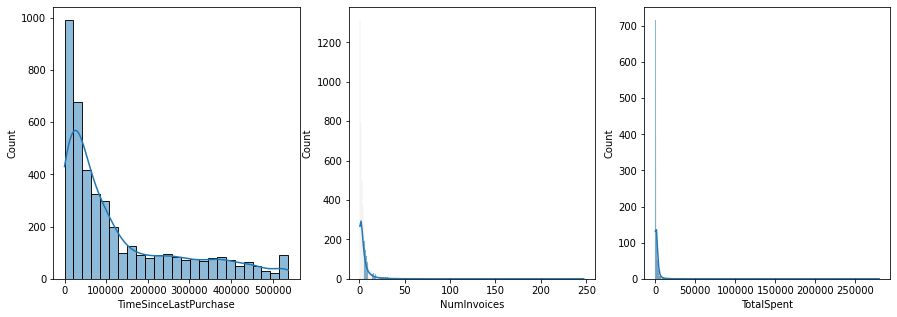

In [24]:
num_cols = ['TimeSinceLastPurchase', 'NumInvoices', 'TotalSpent']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(3):    
    sns.histplot(cust_df[num_cols[i]], kde = True, ax=axes[i])
    axes[i].set_xlabel(num_cols[i])
    
plt.show()

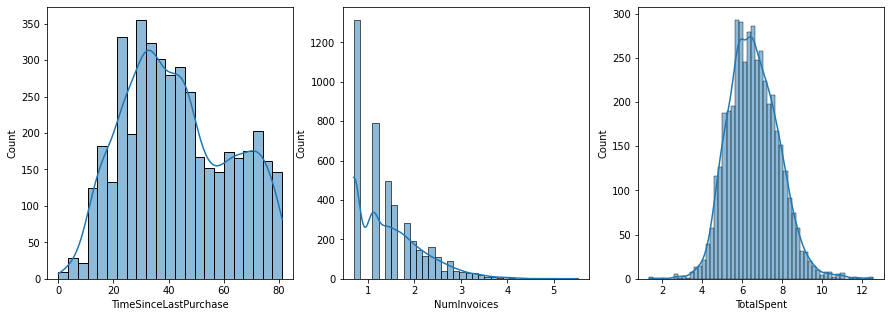

In [25]:
# transforming numerical features to reduce skewness
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.histplot(np.cbrt(cust_df[num_cols[0]]), kde = True, ax=axes[0])
axes[0].set_xlabel(num_cols[0])
sns.histplot(np.log1p(cust_df[num_cols[1]]), kde = True, ax=axes[1])
axes[1].set_xlabel(num_cols[1])
sns.histplot(np.log1p(cust_df[num_cols[2]]), kde = True, ax=axes[2])
axes[2].set_xlabel(num_cols[2])

plt.show()

In [26]:
trans_vars = [np.cbrt(cust_df[num_cols[0]]),
              np.log1p(cust_df[num_cols[1]]),
              np.log1p(cust_df[num_cols[2]])]

Now I apply scaling on the transformed data to fit them to standardized normal distributions.

In [27]:
def standardize(data):
    return (data - data.mean())/data.std()

In [28]:
scaled_vars = [standardize(col) for col in trans_vars]

In [29]:
cust_df = cust_df.iloc[:,:4]

In [30]:
# adding the scaled data to the customer dataframe
for i in range(3):
    cust_df['scaled_' + num_cols[i]] = scaled_vars[i]

# Apply k-prototypes

In [31]:
from kmodes.kprototypes import KPrototypes

In [32]:
models = []
costs = []

for i in range(2,10):
    kproto = KPrototypes(n_clusters=i, random_state = 20)
    kproto.fit(cust_df.iloc[:,3:], categorical = [0])
    
    models.append(kproto)
    costs.append(kproto.cost_)

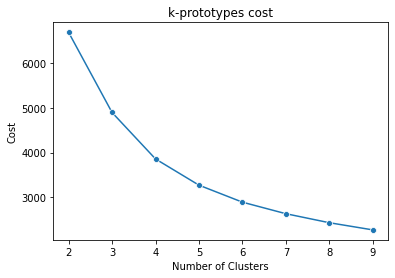

In [33]:
sns.lineplot(x = np.arange(2,10), y = costs, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('k-prototypes cost')
plt.show()

In [34]:
# pick model with 5 clusters and assign clusters to customers
model = models[3]
clusters = model.predict(cust_df.iloc[:,3:], categorical = [0])

In [35]:
cust_df['Cluster'] = clusters

In [36]:
# get means of each numerical feature for each cluster
groupby_clusters = cust_df.groupby('Cluster')
groupby_clusters[num_cols].mean()

,TimeSinceLastPurchase,NumInvoices,TotalSpent
Cluster,,,
0,54558.485658,1.584570,340.763888
1,21358.138075,20.809623,10338.826862
2,348841.653486,1.373569,276.286649
3,29103.245283,5.733962,1690.134454
4,162067.707617,3.393120,1282.776145


In [37]:
# get means of each numerical feature transformed for each cluster
groupby_clusters = cust_df.groupby('Cluster')
groupby_clusters[['scaled_' + col for col in num_cols]].mean()

,scaled_TimeSinceLastPurchase,scaled_NumInvoices,scaled_TotalSpent
Cluster,,,
0,-0.391644,-0.715288,-0.732331
1,-1.038944,1.996600,1.693006
2,1.372156,-0.827192,-0.926447
3,-0.790815,0.564019,0.563273
4,0.506375,-0.041950,0.275646


In [38]:
# get size of each cluster
groupby_clusters.size()

Cluster
0    1011
1     478
2     961
3    1060
4     814
dtype: int64

In [39]:
# get proportions of countries in each cluster
cluster_country_props = groupby_clusters['Country'].value_counts()/groupby_clusters.size()

In [40]:
for i in range(5):
    print(f'Top 5 Cluster {i} country proportions')
    print(cluster_country_props[i][:5])

Top 5 Cluster 0 country proportions
Country
United Kingdom    0.931751
Germany           0.017804
France            0.012859
Spain             0.006924
Italy             0.004946
dtype: float64
Top 5 Cluster 1 country proportions
Country
United Kingdom    0.880753
Germany           0.039749
France            0.027197
Belgium           0.006276
Portugal          0.004184
dtype: float64
Top 5 Cluster 2 country proportions
Country
United Kingdom    0.917794
France            0.018730
Germany           0.012487
Portugal          0.006243
Spain             0.005203
dtype: float64
Top 5 Cluster 3 country proportions
Country
United Kingdom    0.900943
France            0.028302
Germany           0.021698
Belgium           0.008491
Spain             0.006604
dtype: float64
Top 5 Cluster 4 country proportions
Country
United Kingdom    0.871007
Germany           0.027027
France            0.015971
Switzerland       0.011057
Spain             0.008600
dtype: float64


In [41]:
# get UK proportion from entire dataset
(cust_df['Country'] == 'United Kingdom').sum()/len(cust_df)

0.9040240518038853

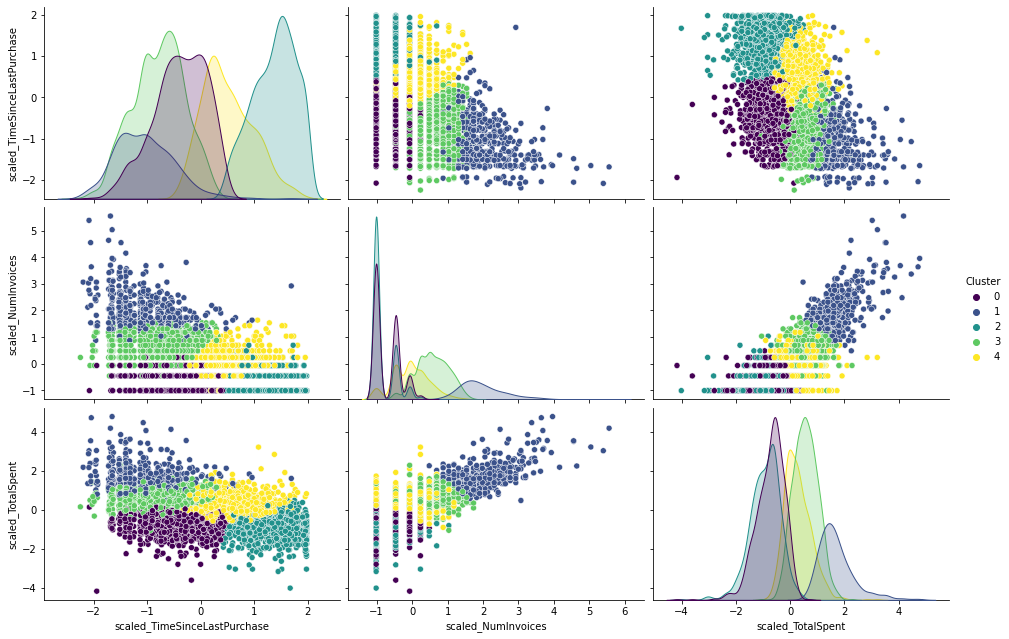

In [52]:
sns.pairplot(cust_df.iloc[:,-4:], hue = 'Cluster', 
             palette='viridis', height = 3, aspect = 1.5)

plt.show()

Let's try to describe these clusters. Country does not play a big role in distinguishing the clusters.

Cluster 0 contains customers who have shopped relatively recently, have made only a few purchases, and have only spent a little.

Cluster 1 contains customers who have shopped relatively recently, have made a lot of purchases, and have spent a lot.

Cluster 2 contains customers who have not shopped in a while, have made only only a few purchases, and have only spent a little.

Cluster 3 contains customers who have shopped relatively recently, have made a moderate amount of purchases, and have spent a moderate amount.

Cluster 4 contains customers who have not shopped in a while, have made a moderate amount of purchases, and have spent a moderate amount. 